# Keras

A la hora de trabajar con redes neuronales tenemos varias opciones. Una de las más utilizadas es TensorFlow, que permite trabajar con las redes a un nivel de detalle excepcional. Sin embargo, esta capacidad tan buena para los más desarrollados matemáticos, resulta un caos para todo usuario medio. Por ello, surgió Keras, una capa de abstracción que nos permite trabajar con redes neuronales sin tener que tener un amplio dominio de las redes neronales, siendo hoy en día la librería más utilizada para tratar este tipo de problemas.

[Documentación](https://keras.io/guides/)

Para utilizarla, deberemos instalarla. Descomenta las siguientes líneas para hacerlo desde el propio notebook:

In [2]:
# !pip install --user tensorflow

In [3]:
# !pip install keras

Dicho esto, pasemos a la acción.

Empezaremos importando las principales librerías que vamos a utilizar, donde ya podemos ver la aparición de Keras y TensorFlow:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
import time

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

Cargamos también los datos de MNIST, que son los datos de imágenes con números escritos a mano. A diferencia de lo que vimos en su día, en este caso tenemos imágenes con más detalle, lo que hará más complicado el problema.

En este caso, como estamos empezando, no vamos a tratar imágenes con redes convolucionales (perdemos la estructura espacial 2D), que son extensamente utilizadas en este tipo de problemas y que explicaremos el próximo día. En este caso, vamos a convertir cada imagen en un vector de píxeles, donde cada una de ellas se corresponderá con un vector de 28x28 features independientes, que serán las entradas del modelo.

In [5]:
# Cogemos las imágenes de los dígitos así como el conjunto de train y test:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Analizamos las dimensiones del dataset:

In [6]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Y vemos qué pinta tiene una imagen en concreto:

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

En total son 60.000 imágenes de 28x28 pixeles cada una. Ya hemos visto una imagen en forma de array, pero también podemos interpretarla como una imagen en blanco y negro con diferentes intensidades de color:

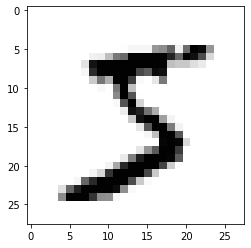

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Si te fijas bien en los datos anteriores, cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

### EJERCICIO

1. ¿Se te ocurre alguna manera de normalizar los datos?

Mantén los nombres de X_train y X_test para los valores normalizados:

In [9]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

En este caso, a diferencia de lo que hemos visto para otros modelos, necesitamos separar datos para validación. Estos datos se usarán durante el entrenamiento, así que los cogeremos de train.

Otra opción sería especificarle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [10]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la última (salida) suele ser una softmax.


Tenemos diferentes formas de crear nuestro modelo de Deep Learning:


#### Forma 1:

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

#### Forma 2:

In [12]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [13]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)

(784, 300)


In [15]:
weights

array([[ 0.01397993,  0.00576438,  0.03646979, ..., -0.05092467,
        -0.01598379,  0.01431746],
       [-0.00074552,  0.00881407, -0.04748885, ..., -0.00775999,
         0.0187844 ,  0.03855716],
       [-0.04468891, -0.01394406,  0.01892801, ...,  0.02956097,
        -0.01313779,  0.03021629],
       ...,
       [ 0.01604898,  0.05119246, -0.04299544, ..., -0.00663802,
         0.02326295, -0.03025313],
       [-0.06768203, -0.03587059,  0.01203249, ...,  0.00881524,
        -0.04431164,  0.01304287],
       [-0.0666091 , -0.0038155 , -0.04650301, ...,  0.05749677,
         0.00629291, -0.00796215]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Establecemos la configuración de ejecución mediante el método ``compile``, donde podemos especificar tanto el [optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como la [función de coste](https://www.tensorflow.org/api_docs/python/tf/keras/losses)


También tenemos más de una forma de hacerlo:


#### Forma 1:

In [17]:
model.compile(
    optimizer=keras.optimizers.SGD(), # optimizer = 'sgd'
    loss=keras.losses.SparseCategoricalCrossentropy(), # "sparse_categorical_crossentropy"
    metrics=['accuracy']
)

#### Forma 2:

In [18]:
# Equivalente
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Con el método ``compile`` no ejecuta nada, solo termina de crear la red neuronal con la configuración especificada.

Por lo tanto, ahora tenemos que entrenar el modelo, para lo que usaremos los datos de entrenamiento. El ``batch_size`` es la cantidad de muestras que utiliza el ``SGD`` (descenso de gradiente estocástico, que es una versión con aproximaciones del descenso de gradiente, que permite agilizar cálculos), y las ``epochs`` son las iteraciones que realiza en el entrenamiento.

In [20]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val) # Tb argumento validation_split=0.1
)


Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 140505297354971712.0000 - accuracy: 0.1061 - val_loss: 2.3018 - val_accuracy: 0.1064
Epoch 2/15
782/782 [==============================] - 2s 2ms/step - loss: 2.3015 - accuracy: 0.1127 - val_loss: 2.3018 - val_accuracy: 0.1064
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3010 - accuracy: 0.1157 - val_loss: 2.3019 - val_accuracy: 0.1064
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1127 - val_loss: 2.3019 - val_accuracy: 0.1064
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3008 - accuracy: 0.1150 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1118 - val_loss: 2.3020 - val_accura

Y calculamos el resultado obtenido:

In [21]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 1ms/step - loss: 2.3010 - accuracy: 0.1135
test loss, test acc: [2.301010847091675, 0.11349999904632568]


### EJERCICIO

Prueba a crear una red neuronal, variando las neuronas y las capas, a ver si consigues obtener un resultado mejor que el que acabamos de conseguir. Mantén la métrica de evaluación y la función de coste.

IMPORTANTE: No utilices los nombres que hemos creado anteriormente, si copias parte del código, cámbialos con un sufijo ``_ej1``, por ejemplo.

## Continuando con el modelo

Volviendo al modelo anterior, podemos reentrenarlo para seguir realizando iteraciones y tratar de mejorar el resultado. Porque no empieza de nuevo, sino que retoma el entrenamiento anterior.

In [22]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val) # O podemos usar el argumento validation_split=0.1
)

Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 3/15
782/782 [==============================] - 2s 2ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 4/15
782/782 [==============================] - 2s 2ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [23]:
model.history.history

{'loss': [2.3010776042938232,
  2.3010740280151367,
  2.301077127456665,
  2.3010737895965576,
  2.3010730743408203,
  2.3010730743408203,
  2.3010761737823486,
  2.301077127456665,
  2.301079750061035,
  2.3010756969451904,
  2.301072597503662,
  2.3010737895965576,
  2.3010716438293457,
  2.3010735511779785,
  2.3010730743408203],
 'accuracy': [0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271,
  0.11355999857187271],
 'val_loss': [2.3019862174987793,
  2.3020122051239014,
  2.301983118057251,
  2.301973819732666,
  2.3019866943359375,
  2.3019521236419678,
  2.3020100593566895,
  2.302011013031006,
  2.302014112472534,
  2.3020102977752686,
  2.3020315170288086,
  2.3019864559173584,
  2.3020143508911133,
  2.301986455

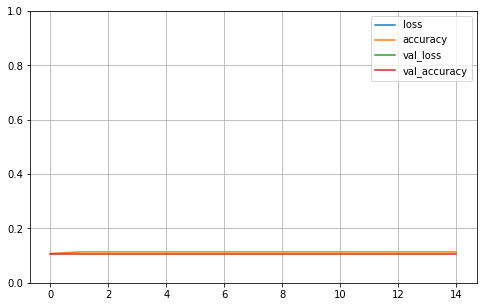

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, podemos actuar para mejorarlo. Podemos cambiar el learning rate y el optimizador. Y después, podemos proceder con las capas, neuronas y funciones de activación. Todas estas combinaciones son poco predecibles a priori, por lo que no tenemos un librillo que nos diga qué hacer en cada caso.

En este caso parece que ha ido bastante bien, por lo que continuaremos con el mismo modelo. Como ya está entrenado, probémoslo con los datos de test para ver el real desempeño de nuestro modelo:

In [25]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 1ms/step - loss: 2.3010 - accuracy: 0.1135
test loss, test acc: [2.3010218143463135, 0.11349999904632568]


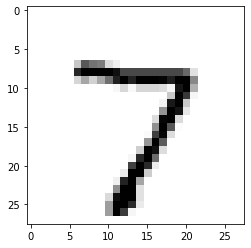

In [26]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [27]:
y_test[0]

7

In [28]:
predictions = model.predict(X_test[:1]).round(3)
print("shape", predictions.shape)
predictions

shape (1, 10)


array([[0.099, 0.114, 0.099, 0.102, 0.097, 0.09 , 0.099, 0.104, 0.097,
        0.1  ]], dtype=float32)

In [29]:
predictions.max()

0.114

In [30]:
predictions.argmax()

1

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [31]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation:

In [32]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer='sgd')
history = model.fit(X_train,
         y_train,
         epochs=20,
         validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9438 - val_loss: 0.5098
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.7212 - val_loss: 0.5018
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4442 - val_loss: 0.3956
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4738 - val_loss: 0.3723
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4019 - val_loss: 0.3602
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3939 - val_loss: 0.3535
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3619 - val_loss: 0.3467
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3579 - val_loss: 0.3386
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3491 - val_loss: 0.3334
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3410 - val_loss: 0.3296

In [35]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 571us/step - loss: 0.2896


0.2896278500556946

In [36]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[3.2895954],
       [3.0307524],
       [0.9929641]], dtype=float32)

In [37]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[3.2895954],
       [3.0307524],
       [0.9929641]], dtype=float32)

In [38]:
y_test[:3]

array([5.   , 2.735, 1.107])

### Guardar modelo

Para guardar el modelo, en el formato de Keras (HDF5). 

In [39]:
model.save('my_model.h5')

In [40]:
# Lo volvemos a cargar
model = keras.models.load_model('my_model.h5')

### Callbacks
Sirven para que el modelo se vaya guardando tras cada epoch, así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint("callback_model.h5")

history = model.fit(X_train,
                     y_train,
                     epochs=20,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint]
                   )

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3096 - val_loss: 0.3090
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3076 - val_loss: 0.2976
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3075 - val_loss: 0.3047
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3034 - val_loss: 0.3037
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3033 - val_loss: 0.2977
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3020 - val_loss: 0.2895
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2988 - val_loss: 0.2953
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2988 - val_loss: 0.2916
Epoch 9/20
363/363 [==============================] - 0s 901us/step - loss: 0.2989 - val_loss: 0.3140
Epoch 10/20
363/363 [==============================] - 0s 925us/step - loss: 0.2969 - val_loss: 0.

### EJERCICIO

Lee el modelo ``callback_model.h5`` en la variable ``modelo_ej`` y:

1. Realiza otras 20 epochs y vuelve a calcular el score del modelo con los datos de test
2. Fíjate en los valores de ``val_loss``, ¿qué le sucede?
3. Las evaluaciones son aleatorias, por lo que no siempre nos darán lo mismo, auqnue su tendencia sí que será parecida. Compara los resultados del modelo ``model`` frente al modelo ``modelo_ej``:

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un número de epochs llamado `patience`. Se puede combinar con el callback:

In [42]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                              restore_best_weights=True)

model.fit(X_train,
          y_train,
          epochs=20,
          validation_data=(X_valid, y_valid),
          callbacks=[checkpoint, early_stopping]
         )

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2845 - val_loss: 0.2898
Epoch 2/20
363/363 [==============================] - 0s 983us/step - loss: 0.2838 - val_loss: 0.2841
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2832 - val_loss: 0.2894
Epoch 4/20
363/363 [==============================] - 0s 948us/step - loss: 0.2841 - val_loss: 0.2946
Epoch 5/20
363/363 [==============================] - 0s 991us/step - loss: 0.2819 - val_loss: 0.2814
Epoch 6/20
363/363 [==============================] - 0s 945us/step - loss: 0.2817 - val_loss: 0.2921
Epoch 7/20
363/363 [==============================] - 0s 912us/step - loss: 0.2806 - val_loss: 0.2791
Epoch 8/20
363/363 [==============================] - 0s 876us/step - loss: 0.2809 - val_loss: 0.2804
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2784 - val_loss: 0.2795
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2796 - val_

In [ ]:
model.evaluate(X_test, y_test)

### ¿Cómo elijo los parámetros para inicializar el modelo?

Esta es una pregunta muy repetida entre los que empiezan con los modelos de Machine Learning, y es una pregunta muy acertada. Así que si os preguntáis esto, vais por buen camino.

Sin embargo, tal como hemos visto en muchas de las acciones pasadas, no tenemos una fórmula mágica que nos ayude a definir los parámetros concretos con los que mejor funcionará nuestro algoritmo. En cambio, sí que tenemos ciertas pautas que seguir:

1. Asegúrate de que necesitas usar una red neuronal, ya que quizás tu problema se pueda resolver con otros modelos menos costoss computacionalmente o que no requieran tantos datos para aprender y ofrecer buenos resultados.
2. La clave para elegir los elementos de nuestra red neuronal, es decir, el número de capas y neuronas, es ir probando evaluando los resultados que obtenemos. Es buena técnica empezar de menos a más, siempre comprobando los resultados que vamos obteniendo.
    * Si ves que obtienes mucho error en train, habrá que añadir capas o neuronas a las capas que tienes, cambiar los learning_rates...
    * Si ves que en test tienes mucho error en comparación con train, significa que estás sobreentrenando, por lo que tendrás que reducir capas, neuronas o epochs
3. Cuantas más epochs, más probabilidad de overfitting, por lo que tendremos que tener cuidado, para lo que podemos utilizar el early stopping


Además, podemos basarnos en la siguiente tabla para entender cómo afecta la selección del número de capas:

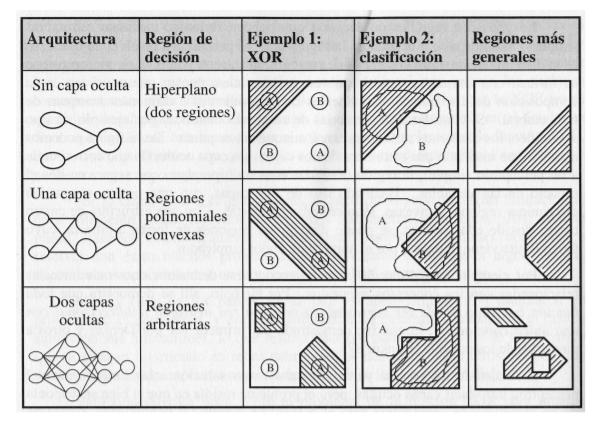